In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [37]:
df_cities = pd.read_csv('1000_cities.csv', delimiter=';')
df_cities.head()
df_cities = df_cities[df_cities.State != ('Alaska' or 'Hawaii')]

In [38]:
lat = []
lon = []

for row in df_cities['Coordinates']:
    try:
        lat.append(row.split(',')[0])
        lon.append(row.split(',')[1])
    except:
        lat.append(np.nan)
        lon.append(np.nan)
df_cities['Lat'] = lat
df_cities['Lon'] = lon


In [39]:
df_cities.Lat.head()
min(lats)

'21.3069444'

No handles with labels found to put in legend.


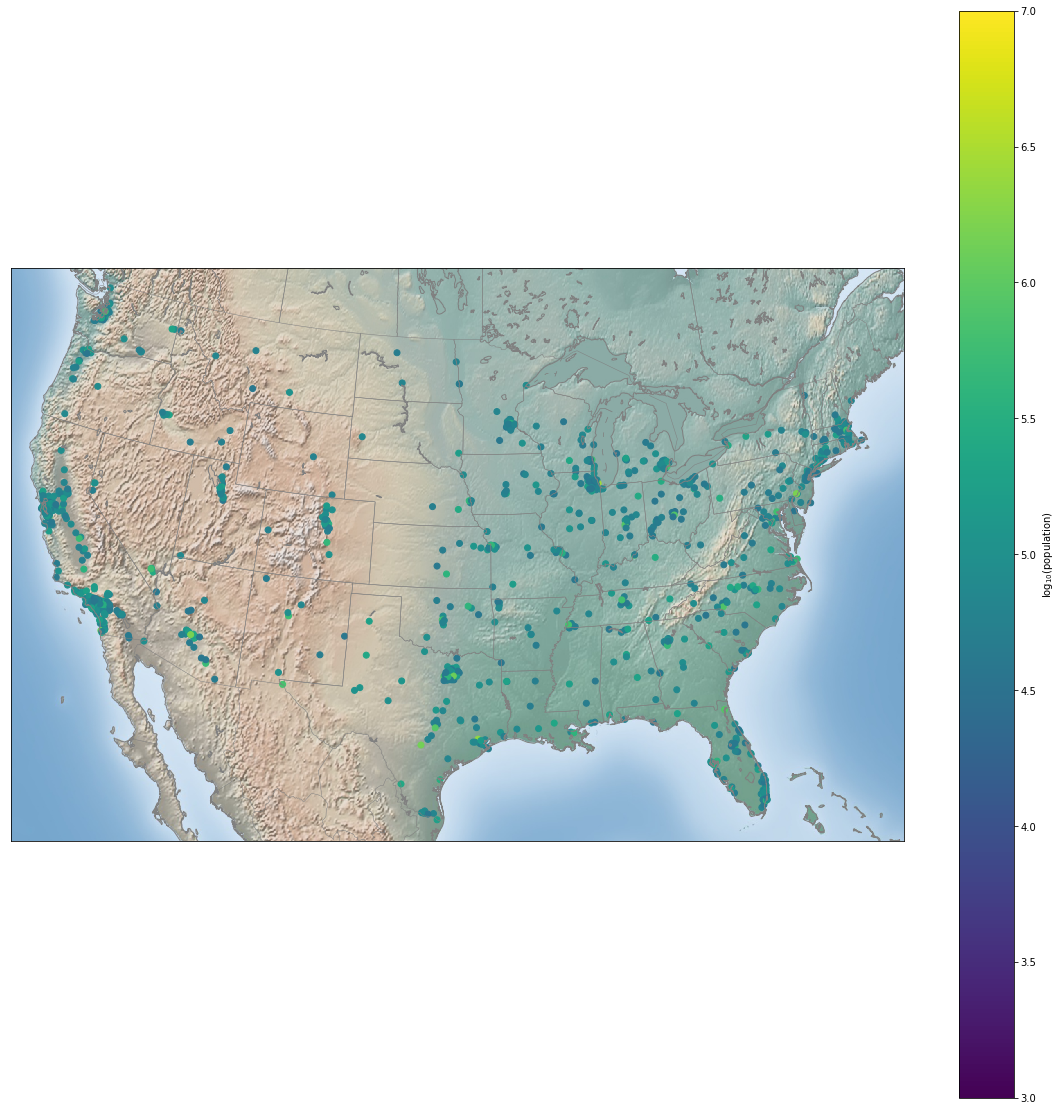

In [46]:
margin = 5
lats = df_cities.Lat.values
lons = df_cities.Lon.values
population = df_cities.Population.values

fig = plt.figure(figsize=(20,20))
m = Basemap(projection='lcc', resolution='i', 
            llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
            lat_1=33,lat_2=45,lon_0=-95)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lons, lats,latlon=True,
          c=np.log10(population))

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)


plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');

In [42]:
lats[0:10]

array(['37.654656', '33.5676842', '44.0805434', '45.1732394',
       '42.4250964', '40.0455917', '26.4614625', '26.6617635',
       '38.789217', '41.0997803'], dtype=object)

https://stackoverflow.com/questions/54488720/how-to-plot-lines-between-multiple-x-y-points-in-matplotlib-basemap